In [1]:
! pip install faker pandas numpy

Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
    --------------------------------------- 0.0/1.9 MB 435.7 kB/s eta 0:00:05
   - -------------------------------------- 0.1/1.9 MB 469.7 kB/s eta 0:00:05
   - -------------------------------------- 0.1/1.9 MB 435.7 kB/s eta 0:00:05
   -- ------------------------------------- 0.1/1.9 MB 774.0 kB/s eta 0:00:03
   -------- ------------------------------- 0.4/1.9 MB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 1.9/1.9 MB 7.7 MB/s eta 0:00:00


In [3]:
import json
import numpy as np
import random
from faker import Faker
import pandas as pd
import random
import string

# Initialize Faker
fake = Faker()

# Define job roles with approximate percentages in a typical corporation
job_roles_distribution = {
    'Software Engineer': 15,          # 15%
    'Senior Software Engineer': 8,     # 8%
    'Tech Lead': 3,                   # 3%
    'Product Manager': 5,             # 5%
    'Project Manager': 7,             # 7%
    'Data Scientist': 4,              # 4%
    'Data Analyst': 6,                # 6%
    'UX Designer': 3,                 # 3%
    'UI Designer': 3,                 # 3%
    'HR Specialist': 5,               # 5%
    'HR Manager': 2,                  # 2%
    'Marketing Specialist': 10,        # 10%
    'Sales Representative': 15,        # 15%
    'Customer Support': 12,           # 12%
    'Finance Analyst': 7              # 7%
}

# Convert percentages to actual counts for 1000 employees
total_percentage = sum(job_roles_distribution.values())
job_roles_counts = {role: int(round((percentage / total_percentage) * 1000)) 
                   for role, percentage in job_roles_distribution.items()}

# Adjust to ensure we have exactly 1000 employees
total_count = sum(job_roles_counts.values())
if total_count < 1000:
    # Add the difference to the largest role
    largest_role = max(job_roles_counts, key=job_roles_counts.get)
    job_roles_counts[largest_role] += (1000 - total_count)
elif total_count > 1000:
    # Subtract from the largest role
    largest_role = max(job_roles_counts, key=job_roles_counts.get)
    job_roles_counts[largest_role] -= (total_count - 1000)

# Define locations
locations = [
    'New York', 'San Francisco', 'Chicago', 'Minneapolis', 'Seattle',
    'Boston', 'Hartford', 'Atlanta', 'Dallas'
]

# Define salary ranges based on job role
def get_base_salary(role):
    salary_ranges = {
        'Software Engineer': (80000, 120000),
        'Senior Software Engineer': (110000, 160000),
        'Tech Lead': (130000, 180000),
        'Product Manager': (100000, 150000),
        'Project Manager': (90000, 140000),
        'Data Scientist': (95000, 145000),
        'Data Analyst': (70000, 110000),
        'UX Designer': (85000, 130000),
        'UI Designer': (80000, 125000),
        'HR Specialist': (60000, 90000),
        'HR Manager': (90000, 130000),
        'Marketing Specialist': (65000, 100000),
        'Sales Representative': (60000, 120000),
        'Customer Support': (50000, 80000),
        'Finance Analyst': (75000, 115000)
    }
    return random.uniform(*salary_ranges.get(role, (50000, 100000)))

# Location adjustment factors (multiplier for base salary)
location_factors = {
    'New York': 1.2,
    'San Francisco': 1.25,
    'Chicago': 1.1,
    'Minneapolis': 1.05,
    'Seattle': 1.15,
    'Boston': 1.15,
    'Hartford': 1.0,
    'Atlanta': 0.95,
    'Dallas': 1.0
}

# List of words for the password field
password_words = [
    "apple", "beach", "cloud", "dance", "eagle", "flame", "globe", "honey", 
    "igloo", "jolly", "kite", "lemon", "mango", "noble", "ocean", "piano", 
    "quake", "river", "solar", "tiger", "umbra", "vivid", "whale", "xenon", 
    "yacht", "zebra", "amber", "blaze", "coral", "dwell", "ember", "frost", 
    "glade", "haste", "ivory", "jewel", "knoll", "lunar", "maple", "nimble", 
    "oasis", "plume", "quill", "ridge", "swift", "tulip", "urban", "vapor", 
    "wispy", "xeric", "yearn", "zesty", "aroma", "bloom", "crisp", "drift", 
    "elate", "flare", "glide", "haven", "inlet", "jaunt", "knack", "lucid", 
    "mirth", "nexus", "orbit", "pulse", "quell", "realm", "spark", "tidal", 
    "unify", "verve", "woven", "xerox", "yield", "zonal", "azure", "bliss", 
    "charm", "dusk", "echo", "flair", "grace", "halo", "ideal", "jazz", 
    "keen", "lush", "mist", "noble", "onyx", "poise", "quest", "radiant", 
    "serene", "trance", "unique", "valor", "whim", "xanadu", "yonder", "zephyr"
]

# Generate employee data
employees = []

# Create all 1000 employees
for i in range(1000):
    # Generate a unique ID
    employee_id = i + 1
    
    # Generate name
    name = fake.name()
    
    # Generate username (first initial + last name, lowercase)
    name_parts = name.split(' ')
    first_name = name_parts[0]
    last_name = name_parts[-1]  # Take the last part as the last name
    username = (first_name[0] + last_name).lower().replace(' ', '').replace('.', '').replace('-', '')
    
    # Select password word - FIXED: Select a new random password for each employee
    password = random.choice(password_words)
    
    # Generate phone number in the format specified
    area_codes = {
        'New York': '212',
        'San Francisco': '415',
        'Chicago': '312',
        'Minneapolis': '612',
        'Seattle': '206',
        'Boston': '617',
        'Hartford': '860',
        'Atlanta': '404',
        'Dallas': '214'
    }
    
    # Determine job role based on distribution
    remaining_roles = {role: count for role, count in job_roles_counts.items() if count > 0}
    if not remaining_roles:
        # If we've used up all allocated roles, pick any role
        role = random.choice(list(job_roles_distribution.keys()))
    else:
        # Pick a role from remaining ones
        role = random.choice(list(remaining_roles.keys()))
        job_roles_counts[role] -= 1
    
    # Determine location
    location = random.choice(locations)
    
    # Generate phone number with appropriate area code
    area_code = area_codes.get(location, '555')  # Default to 555 if location not found
    phone_number = f"{area_code}-555-{random.randint(1000, 9999)}"
    
    # Calculate salary
    base_salary = get_base_salary(role)
    noise_factor = random.uniform(0.95, 1.05)  # Add some noise
    salary = int(round(base_salary * location_factors[location] * noise_factor, -3))  # Round to nearest thousand
    
    # Create employee record
    employee = {
        "id": employee_id,
        "name": name,
        "username": username,
        "password": password,
        "phone_number": phone_number,
        "job_role": role,
        "work_location": location,
        "salary": salary
    }
    
    employees.append(employee)

# Save to JSON file
with open('employee_data.json', 'w') as f:
    json.dump(employees, f, indent=2)

# Convert to DataFrame for analysis
df = pd.DataFrame(employees)

# Display summary statistics
print(f"Successfully generated {len(employees)} employee records")
print(f"Data saved to employee_data.json")

# Print distribution of roles for verification
role_counts = df['job_role'].value_counts()
print("\nJob Role Distribution:")
for role, count in role_counts.items():
    print(f"{role}: {count} employees ({count/len(employees)*100:.1f}%)")

print("\nLocation Distribution:")
loc_counts = df['work_location'].value_counts()
for loc, count in loc_counts.items():
    print(f"{loc}: {count} employees ({count/len(employees)*100:.1f}%)")

# Display first few records
print("\nSample Records:")
print(df.head(5).to_string())

# Verify passwords are unique
print("\nPassword Distribution (first 10):")
print(df['password'].value_counts().head(10))


Successfully generated 1000 employee records
Data saved to employee_data.json

Job Role Distribution:
Sales Representative: 143 employees (14.3%)
Software Engineer: 141 employees (14.1%)
Customer Support: 114 employees (11.4%)
Marketing Specialist: 95 employees (9.5%)
Senior Software Engineer: 76 employees (7.6%)
Project Manager: 67 employees (6.7%)
Finance Analyst: 67 employees (6.7%)
Data Analyst: 57 employees (5.7%)
Product Manager: 48 employees (4.8%)
HR Specialist: 48 employees (4.8%)
Data Scientist: 38 employees (3.8%)
UI Designer: 29 employees (2.9%)
UX Designer: 29 employees (2.9%)
Tech Lead: 29 employees (2.9%)
HR Manager: 19 employees (1.9%)

Location Distribution:
Dallas: 126 employees (12.6%)
Chicago: 122 employees (12.2%)
Atlanta: 117 employees (11.7%)
New York: 114 employees (11.4%)
Minneapolis: 110 employees (11.0%)
San Francisco: 109 employees (10.9%)
Hartford: 105 employees (10.5%)
Seattle: 99 employees (9.9%)
Boston: 98 employees (9.8%)

Sample Records:
   id         

In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pickle
import json

# Load the employee data
try:
    with open('employee_data.json', 'r') as f:
        employees = json.load(f)
    df = pd.DataFrame(employees)
    print(f"Loaded {len(df)} employee records from employee_data.json")
except FileNotFoundError:
    print("Error: employee_data.json file not found. Please run the data generation script first.")
    exit(1)

# Display the first few rows to verify data
print("\nSample data:")
print(df.head())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Basic statistics for salary
print("\nSalary statistics:")
print(df['salary'].describe())

# Prepare features (X) and target (y)
X = df[['job_role', 'work_location']]
y = df['salary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

# Create a preprocessing pipeline with one-hot encoding for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['job_role', 'work_location'])
    ])

# Create the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the model
print("\nTraining the model...")
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Evaluation:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

# Get feature names after one-hot encoding
feature_names = model.named_steps['preprocessor'].get_feature_names_out()

# Get coefficients
coefficients = model.named_steps['regressor'].coef_

# Display the top 5 positive and negative coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
print("\nTop 5 positive coefficients:")
print(coef_df.sort_values('Coefficient', ascending=False).head(5))
print("\nTop 5 negative coefficients:")
print(coef_df.sort_values('Coefficient').head(5))

# Save the model to a file
with open('salary_prediction_model.pkl', 'wb') as f:
    pickle.dump(model, f)
print("\nModel saved as 'salary_prediction_model.pkl'")

# Create a simple function to test the model with new inputs
def predict_salary(job_role, work_location):
    input_data = pd.DataFrame({
        'job_role': [job_role],
        'work_location': [work_location]
    })
    predicted_salary = model.predict(input_data)[0]
    return round(predicted_salary, 2)

# Test the model with a few examples
print("\nSample predictions:")
test_cases = [
    ('Software Engineer', 'San Francisco'),
    ('HR Specialist', 'Hartford'),
    ('Data Scientist', 'New York'),
    ('Customer Support', 'Atlanta')
]

for job_role, location in test_cases:
    predicted = predict_salary(job_role, location)
    print(f"Predicted salary for {job_role} in {location}: ${predicted:,.2f}")

# Create a dictionary of all possible job roles and locations for the frontend
job_roles = sorted(df['job_role'].unique().tolist())
locations = sorted(df['work_location'].unique().tolist())

# Save these options to a JSON file for the frontend
options = {
    'job_roles': job_roles,
    'locations': locations
}

with open('prediction_options.json', 'w') as f:
    json.dump(options, f, indent=2)
print("\nJob roles and locations saved to 'prediction_options.json' for frontend use")






Loaded 1000 employee records from employee_data.json

Sample data:
   id           name  username password  phone_number  \
0   1     Brian Long     blong    flame  860-555-9043   
1   2  Diamond Price    dprice    knack  617-555-1875   
2   3   Jose Ramirez  jramirez    zonal  415-555-6079   
3   4  Nicholas Shaw     nshaw    grace  212-555-9178   
4   5  Michael Perry    mperry    tidal  312-555-9522   

                   job_role  work_location  salary  
0               UI Designer       Hartford   85000  
1  Senior Software Engineer         Boston  147000  
2            Data Scientist  San Francisco  171000  
3                HR Manager       New York  151000  
4      Sales Representative        Chicago  126000  

Missing values:
id               0
name             0
username         0
password         0
phone_number     0
job_role         0
work_location    0
salary           0
dtype: int64

Salary statistics:
count      1000.000000
mean     106615.000000
std       29939.992956
m


===== COMPREHENSIVE MODEL EVALUATION =====
R² Score: 0.7848
Mean Squared Error (MSE): 201544828.78
Root Mean Squared Error (RMSE): 14196.65
Mean Absolute Error (MAE): 11682.13
Explained Variance: 0.7851

===== RESIDUAL STATISTICS =====
count      200.000000
mean      -520.388122
std      14222.709033
min     -28070.710242
25%     -10606.859214
50%      -1914.966919
75%       9468.391824
max      35416.744920
Name: Residual, dtype: float64

Shapiro-Wilk Test for Normality of Residuals:
Statistic: 0.9839, p-value: 0.0216
Residuals are not normally distributed


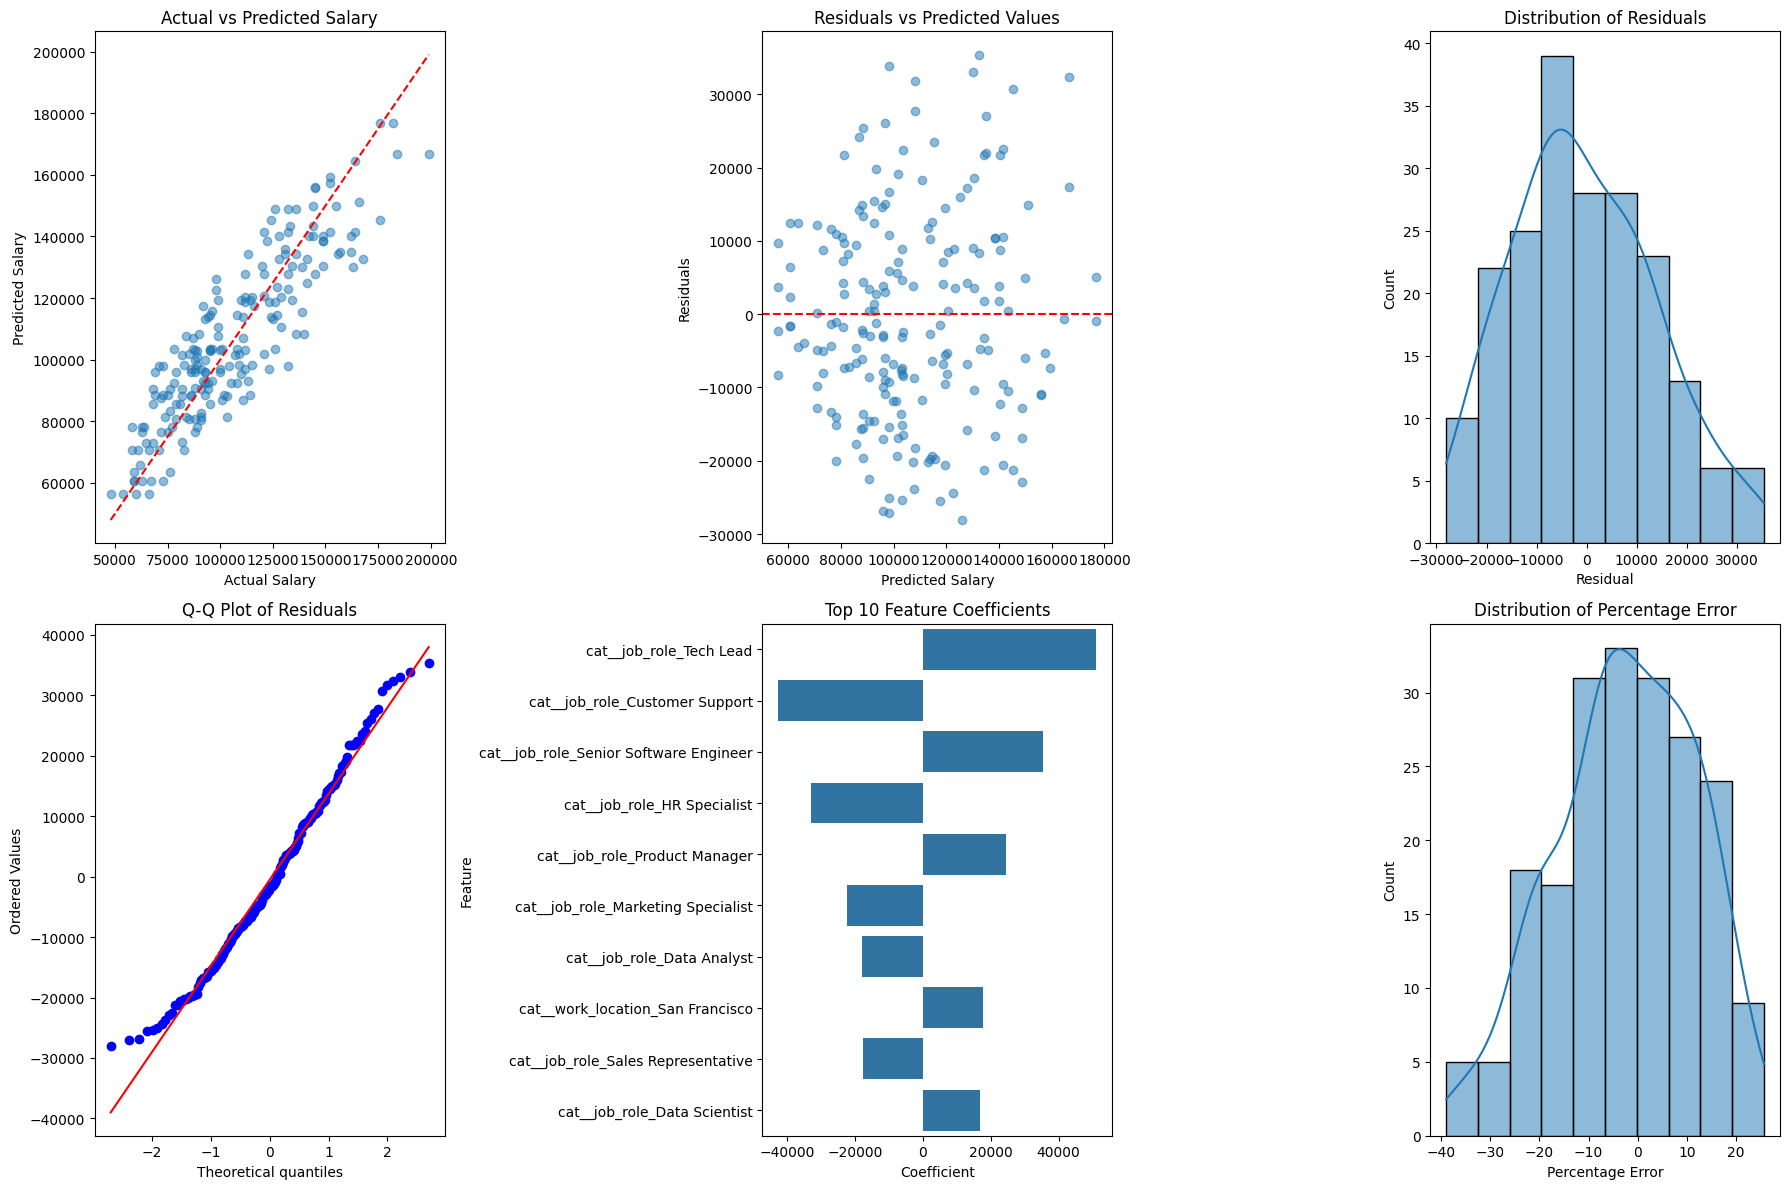

Predictions within 5% of actual value: 25.00%
Predictions within 10% of actual value: 52.50%
Predictions within 15% of actual value: 70.50%
Predictions within 20% of actual value: 82.00%
Predictions within 25% of actual value: 94.00%

===== R² BY JOB ROLE =====
Senior Software Engineer: R² = 0.3924 (n=20)
Sales Representative: R² = 0.1799 (n=32)
UX Designer: R² = 0.5760 (n=11)
Marketing Specialist: R² = 0.3682 (n=19)
Customer Support: R² = -0.0219 (n=24)
Product Manager: R² = 0.3057 (n=11)
Project Manager: R² = 0.3933 (n=13)
Finance Analyst: R² = -0.0819 (n=11)
Software Engineer: R² = 0.2897 (n=26)

===== R² BY LOCATION =====
Hartford: R² = 0.7812 (n=25)
Boston: R² = 0.6870 (n=21)
New York: R² = 0.7060 (n=22)
Chicago: R² = 0.7928 (n=22)
Minneapolis: R² = 0.7594 (n=22)
Dallas: R² = 0.8046 (n=24)
Seattle: R² = 0.7501 (n=23)
Atlanta: R² = 0.8100 (n=33)

===== AVERAGE SALARY BY JOB ROLE AND LOCATION =====
work_location               Atlanta     Boston    Chicago     Dallas  \
job_role     

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, explained_variance_score
from scipy import stats

# Calculate additional metrics
mae = mean_absolute_error(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)
residuals = y_test - y_pred

# Print comprehensive model evaluation metrics
print("\n===== COMPREHENSIVE MODEL EVALUATION =====")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Explained Variance: {explained_variance:.4f}")

# Create a DataFrame for actual vs predicted values
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Residual': residuals
})

# Calculate descriptive statistics for residuals
print("\n===== RESIDUAL STATISTICS =====")
print(results_df['Residual'].describe())

# Normality test for residuals
stat, p_value = stats.shapiro(residuals)
print(f"\nShapiro-Wilk Test for Normality of Residuals:")
print(f"Statistic: {stat:.4f}, p-value: {p_value:.4f}")
print(f"Residuals are {'normally distributed' if p_value > 0.05 else 'not normally distributed'}")

# Set up the matplotlib figure
plt.figure(figsize=(18, 12))

# 1. Actual vs Predicted Plot
plt.subplot(2, 3, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')

# 2. Residuals Plot
plt.subplot(2, 3, 2)
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Salary')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')

# 3. Residual Distribution
plt.subplot(2, 3, 3)
sns.histplot(residuals, kde=True)
plt.xlabel('Residual')
plt.title('Distribution of Residuals')

# 4. Q-Q Plot for Residuals
plt.subplot(2, 3, 4)
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')

# 5. Feature Importance (Top 10)
plt.subplot(2, 3, 5)
top_features = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)
top_n = min(10, len(top_features))
sns.barplot(x='Coefficient', y='Feature', data=top_features.head(top_n))
plt.title(f'Top {top_n} Feature Coefficients')

# 6. Prediction Error Distribution
plt.subplot(2, 3, 6)
error_percentage = (residuals / y_test) * 100
sns.histplot(error_percentage, kde=True)
plt.xlabel('Percentage Error')
plt.title('Distribution of Percentage Error')

plt.tight_layout()
plt.show()

# Calculate prediction accuracy within different error margins
error_margins = [5, 10, 15, 20, 25]
for margin in error_margins:
    within_margin = (abs(error_percentage) < margin).mean() * 100
    print(f"Predictions within {margin}% of actual value: {within_margin:.2f}%")

# Calculate R² for each job role (if enough data)
print("\n===== R² BY JOB ROLE =====")
job_roles_with_enough_data = []

for role in df['job_role'].unique():
    role_indices = X_test[X_test['job_role'] == role].index
    if len(role_indices) >= 10:  # Only calculate if we have enough test samples
        job_roles_with_enough_data.append(role)
        role_y_test = y_test.loc[role_indices]
        role_y_pred = y_pred[X_test['job_role'] == role]
        role_r2 = r2_score(role_y_test, role_y_pred)
        print(f"{role}: R² = {role_r2:.4f} (n={len(role_indices)})")

# Calculate R² for each location (if enough data)
print("\n===== R² BY LOCATION =====")
for loc in df['work_location'].unique():
    loc_indices = X_test[X_test['work_location'] == loc].index
    if len(loc_indices) >= 10:  # Only calculate if we have enough test samples
        loc_y_test = y_test.loc[loc_indices]
        loc_y_pred = y_pred[X_test['work_location'] == loc]
        loc_r2 = r2_score(loc_y_test, loc_y_pred)
        print(f"{loc}: R² = {loc_r2:.4f} (n={len(loc_indices)})")

# Create a cross-tabulation of average salaries by job role and location
print("\n===== AVERAGE SALARY BY JOB ROLE AND LOCATION =====")
salary_pivot = pd.pivot_table(df, values='salary', 
                             index='job_role', 
                             columns='work_location', 
                             aggfunc='mean')
print(salary_pivot.round(2))


In [8]:
# Calculate overall accuracy metrics
from sklearn.metrics import mean_absolute_percentage_error

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Calculate custom accuracy metrics
accuracy_r2 = max(0, 100 * r2)  # R² as a percentage (capped at 0)
accuracy_1_minus_mape = max(0, 100 * (1 - mape))  # 1-MAPE as a percentage

# Calculate percentage of predictions within different error thresholds
abs_pct_error = abs((y_test - y_pred) / y_test) * 100
within_5pct = (abs_pct_error <= 5).mean() * 100
within_10pct = (abs_pct_error <= 10).mean() * 100
within_20pct = (abs_pct_error <= 20).mean() * 100

print("\n===== OVERALL MODEL ACCURACY =====")
print(f"R² Score: {r2:.4f} (Higher is better, 1.0 is perfect)")
print(f"R² as accuracy percentage: {accuracy_r2:.2f}%")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f} or {mape*100:.2f}%")
print(f"Accuracy based on 1-MAPE: {accuracy_1_minus_mape:.2f}%")
print(f"Predictions within 5% of actual value: {within_5pct:.2f}%")
print(f"Predictions within 10% of actual value: {within_10pct:.2f}%")
print(f"Predictions within 20% of actual value: {within_20pct:.2f}%")

# Calculate median absolute percentage error (MdAPE) - often more robust than MAPE
mdape = np.median(abs_pct_error)
print(f"Median Absolute Percentage Error (MdAPE): {mdape:.2f}%")

# Print a simple accuracy summary
print("\n===== ACCURACY SUMMARY =====")
if r2 > 0.9:
    r2_rating = "Excellent"
elif r2 > 0.8:
    r2_rating = "Very Good"
elif r2 > 0.7:
    r2_rating = "Good"
elif r2 > 0.6:
    r2_rating = "Moderate"
elif r2 > 0.5:
    r2_rating = "Fair"
else:
    r2_rating = "Poor"

print(f"Model Quality (based on R²): {r2_rating} ({r2:.4f})")
print(f"On average, predictions are off by {mape*100:.2f}% of the actual salary value")
print(f"The median prediction is off by {mdape:.2f}% of the actual salary value")



===== OVERALL MODEL ACCURACY =====
R² Score: 0.7848 (Higher is better, 1.0 is perfect)
R² as accuracy percentage: 78.48%
Mean Absolute Percentage Error (MAPE): 0.1156 or 11.56%
Accuracy based on 1-MAPE: 88.44%
Predictions within 5% of actual value: 25.00%
Predictions within 10% of actual value: 52.50%
Predictions within 20% of actual value: 82.00%
Median Absolute Percentage Error (MdAPE): 9.56%

===== ACCURACY SUMMARY =====
Model Quality (based on R²): Good (0.7848)
On average, predictions are off by 11.56% of the actual salary value
The median prediction is off by 9.56% of the actual salary value
